# Numpy und Matplotlib

CPython ist eine interpretierte Programmiersprache, jede Python-Anweisung des Codes wird Zeile für Zeile eingelesen, übersetzt und dann ausgeführt. Folge: Im Gegensatz zu kompilierten Programmiersprachen relativ langsame Ausführung, besonders bei Schleifen. Meist ca. 100x langsamer als C.

## Motivation: Eine Monte-Carlo-Methode zur Schätzung von $\pi$

#### Lösung mit Schleifen

In [1]:
%%time
# Monte-Carlo-Methode zur näherungsweisen Berechnung von pi
#
# 1. Ziehe N zufällige Punkte aus dem Einheitsquadrat. Jeder Punkt hat eine zufällige x- und y-Koordinate 
#    zwischen 0 und 1 (gleichförmig verteilt).
# 2. Prüfe für jeden dieser Punkte, ob er im Einheitskreis liegt, d.h., ob x**2 + y**2 <= 1 ist.
# 3. Die Fläche eines Viertels des Einheitskreises dividiert dividiert durch die Fläche des Einheitsquadrats ist
#    pi/4. Dies ist ebenfalls die Wahrscheinlichkeit, dass einer zufälligen Punkte im Einheitsquadrat landet.
# 4. Häufigkeit sollte nach Gesetz der großen Zahlen gegen die Wahrscheinlichkeit gehen, d.h.
#    Anzahl der Punkte im Einheitskreis durch Anzahl der Punkte insgesamt sollte gegen pi/4 gehen.
#    "Monte-Carlo-Schätzer für pi = 4*(Anzahl Treffer)/(Anzahl Versuche)

from random import random
from math import pi
N = 4_000_000
hits = 0 # Anzahl der Treffer
for i in range(N):
    x = random()
    y = random()    
    if x*x + y*y <= 1:
        hits += 1

print(f"MC-Schätzer für pi = {4*hits/N} (wahrer Wert: {pi})")

MC-Schätzer für pi = 3.142898 (wahrer Wert: 3.141592653589793)
CPU times: user 1.01 s, sys: 4.77 ms, total: 1.02 s
Wall time: 1.02 s


#### Lösung mit `numpy`
`numpy` ist eine Bibliothek zur Rechnung mit Vektoren, Matrizen und Arrays höherer Ordnung.

In [2]:
import numpy as np
# Enthält die üblichen mathematischen Funktionen und Konstanten
print(f"{np.sin(3.14) = }")
print(f"{np.cos(np.pi) = }")

np.sin(3.14) = np.float64(0.0015926529164868282)
np.cos(np.pi) = np.float64(-1.0)


Ebenfalls vorhanden: random-Bibliothek, die aber Matrizen und Vektoren von Zufallszahlen erzeugen kann.

In [3]:
np.random.random(10)

array([0.25948222, 0.28533704, 0.0287296 , 0.14206538, 0.30864994,
       0.52323547, 0.84792282, 0.13397331, 0.67829329, 0.04821281])

In [4]:
# Matrix von Zufallszahlen
np.random.random([2, 3]) # 2 Zeilen, 3 Spalten

array([[0.01738345, 0.26825953, 0.50449034],
       [0.94720285, 0.51264807, 0.16368095]])

Auf diesen Matrizen arbeiten Funktionen und Operatoren komponentenweise, d.h. wirken auf jeden Matrixeintrag.

In [5]:
# Matrix
A = np.array([[2, 3], [4, 5]])
A

array([[2, 3],
       [4, 5]])

In [6]:
np.sqrt(A)

array([[1.41421356, 1.73205081],
       [2.        , 2.23606798]])

In [7]:
A*A # Komponentenweise Multiplikation

array([[ 4,  9],
       [16, 25]])

In [8]:
A@A # Matrixprodukt

array([[16, 21],
       [28, 37]])

In [9]:
%%time
# MC-Methode mit numpy

N = 4_000_000
x = np.random.random(N)
y = np.random.random(N)

hits = (x*x + y*y <= 1)

print(f"MC-Schätzer für pi = {4*np.sum(hits)/N}")

MC-Schätzer für pi = 3.141273
CPU times: user 52 ms, sys: 19.4 ms, total: 71.4 ms
Wall time: 71.9 ms


## Performance-Messungen ohne iPython (%%time)

In [10]:
# Funktion zur Schätzung von pi mit Monte Carlo
from random import random
def mc_pi(N):
    hits = 0 # Anzahl der Treffer
    for i in range(N):
        x = random()
        y = random()    
        if x*x + y*y <= 1:
            hits += 1
    return 4*hits/N

In [11]:
%%timeit
mc_pi(4_000_000)

531 ms ± 345 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# Performance-Messung mit time
import time
for k in range(10):
    time.sleep(0.1) # Schlafe für eine Zehntelsekunde
    print(time.time())

t1 = time.time()
val = mc_pi(4_000_000)
t2 = time.time()
print(f"Laufzeit = {t2 - t1} Sekunden.")

1728983063.803922
1728983063.9091048
1728983064.0122418
1728983064.1151428
1728983064.222774
1728983064.330653
1728983064.434894
1728983064.537196
1728983064.6424582
1728983064.746392
Laufzeit = 0.5644042491912842 Sekunden.


In [13]:
help(time.perf_counter)

Help on built-in function perf_counter in module time:

perf_counter(...)
    perf_counter() -> float

    Performance counter for benchmarking.



In [14]:
%%time
# Empfohlen für Benchmarks: time.perf_counter() statt time.time()
from time import perf_counter, perf_counter_ns

t1 = perf_counter_ns()
mc_pi(4_000_000)
t2 = perf_counter_ns()
t2-t1

CPU times: user 528 ms, sys: 3.41 ms, total: 531 ms
Wall time: 531 ms


530695292

## Alternative: Numba

In [15]:
import numba
import time

ModuleNotFoundError: No module named 'numba'

In [ ]:
def mc_naive(N):
    hits = 0 # Anzahl der Treffer
    for i in range(N):
        x = random()
        y = random()    
        if x*x + y*y <= 1:
            hits += 1
    return 4*hits/N
    
@numba.njit
def mc_naive_jit(N):
    hits = 0 # Anzahl der Treffer
    for i in range(N):
        x = random()
        y = random()    
        if x*x + y*y <= 1:
            hits += 1
    return 4*hits/N

def mc_numpy(N):
    x = np.random.random(N)
    y = np.random.random(N)
    hits = (x*x + y*y <= 1)
    return 4*np.sum(hits)/N

@numba.njit
def mc_numpy_jit(N):
    x = np.random.random(N)
    y = np.random.random(N)
    hits = (x*x + y*y <= 1)
    return 4*np.sum(hits)/N

In [ ]:
N = 4_000_000

t1 = time.perf_counter()
pi_mc = mc_naive(N)
t2 = time.perf_counter()
print(f"mc_naive: \t {pi_mc} in {t2 - t1} sec.")

t1 = time.perf_counter()
pi_mc = mc_naive_jit(N)
t2 = time.perf_counter()
print(f"mc_naive_jit: \t {pi_mc} in {t2 - t1} sec.")

t1 = time.perf_counter()
pi_mc = mc_numpy(N)
t2 = time.perf_counter()
print(f"mc_numpy: \t {pi_mc} in {t2 - t1} sec.")

t1 = time.perf_counter()
pi_mc = mc_numpy_jit(N)
t2 = time.perf_counter()
print(f"mc_numpy_jit: \t {pi_mc} in {t2 - t1} sec.")

## Matplotlib
Bibliothek zur Visualisierung, angelehnt an MATLAB.

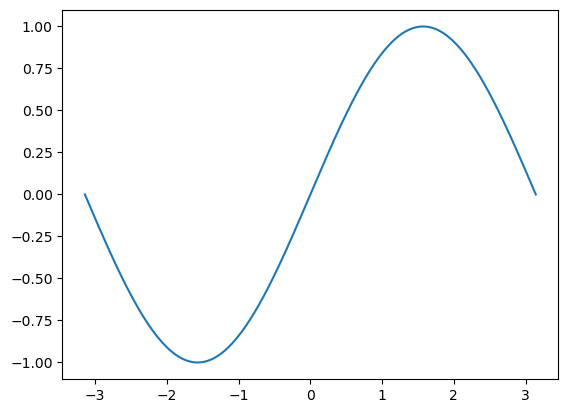

In [16]:
# %matplotlib widgets
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 200)
fig = plt.figure() # Neue Abbildung
plt.plot(x, np.sin(x));
plt.show()  # In einigen Umgebungen wird die Abbildung ohne show() nicht gezeigt.

In [ ]:
# Alternative, weniger an MATLAB orientierte Syntax
fig, ax = plt.subplots()
ax.plot(x, np.sin(x));

In [ ]:
from numpy.random import rand, randn, normal
randn(10) # Ziehe 10 Punkte aus Standardnormalverteilung

In [46]:
normal(0, 1, 10) # Ziehe 10 Punkte aus Standardnormalverteilung

array([-0.6773031 ,  0.99373066, -1.56695859,  1.45719419,  1.4340512 ,
        0.74678844,  0.12432591,  0.5886037 , -0.56057715,  0.10607095])

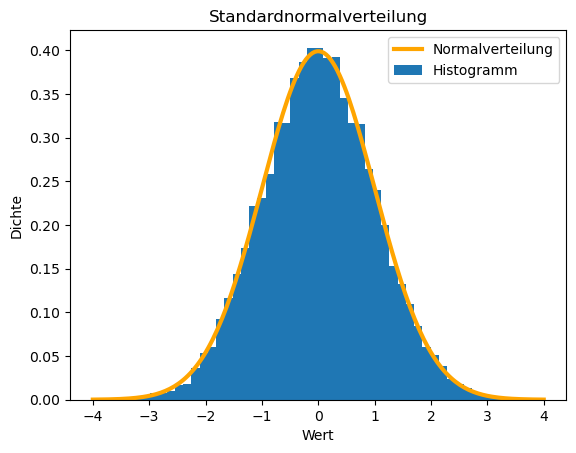

In [96]:
%matplotlib inline
# Dichte der Standardnormalverteilung
def p_normal(x):
    return np.exp(-x*x/2.0)/np.sqrt(2*np.pi)


N = 10_000
x = randn(N)
fig_normal_hist = plt.figure()
plt.title("Standardnormalverteilung")
plt.xlabel("Wert")
plt.ylabel("Dichte")
plt.hist(x, bins=50, density=True)
plt.plot(x_lin, p_normal(x_lin), c='orange', lw=3)
x_lin = np.linspace(-4, 4, 200)
plt.legend(["Normalverteilung", "Histogramm"]) # Labels als Liste von Strings
plt.show()

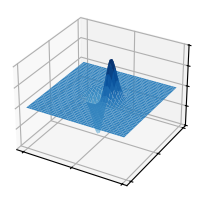

In [25]:
%matplotlib widget
### 3D-Plot
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp( -(X**2 + Y**2) ) * np.sin(X) * np.cos(Y)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

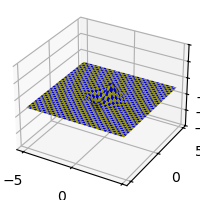

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)) * np.sin(X) * np.cos(Y)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[y, x] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(6))

plt.show()

In [23]:
x = np.arange(1, 3, 1)
y = np.arange(1, 4, 1)
x, y
grid = np.meshgrid(x, y)
grid

(array([[1, 2],
        [1, 2],
        [1, 2]]),
 array([[1, 1],
        [2, 2],
        [3, 3]]))